In [3]:
import sys
sys.path.append("../")
import os
import pickle as pkl
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import Parallel, delayed


from coh_tools import *
from get_5sec_data import *

In [4]:
par_daraframes =  Parallel(n_jobs=2)(delayed(get_dataframes)("C:\\Users\\julien\\lab\\opto_data_analysis",
                             "D:\\lab\\elife\\data", only_paired=False, skip_short=False, skip_single_stim=True,
                                scale_PCA=False, get_cond=False, bands=band_list) for band_list in [["theta", "beta"],["gamma", "high_gamma"]])

In [9]:
dataframes = par_daraframes[0]
dataframes.update(par_daraframes[1])
dataframes.keys()

dict_keys(['theta', 'beta', 'gamma', 'high_gamma'])

In [11]:
dataframes["theta"].head()

Initial_coh   Distance  Coh_proj  Coh_proj_sd     Phase  Distance_to_A1  \
0     1.000000   0.000000  0.108460     2.730262  0.000000        7.211103   
1     0.952858  10.049876  0.135458     3.448591  0.154126        7.211103   
2     0.803837   8.062258  0.152518     3.747250  0.202207        7.211103   
3     0.638091  10.198039  0.166312     4.218359  0.330463        7.211103   
4     0.547514   8.246211  0.168097     4.341379  0.380658        7.211103   

   Distance_to_B1  Distance_to_A2  Distance_to_B2  PC1a_mean  ...  Block_num  \
0       12.727922        7.211103       12.727922   0.855689  ...        1.0   
1       12.727922        7.810250        8.062258   0.855689  ...        1.0   
2       12.727922        6.403124        8.062258   0.855689  ...        1.0   
3       12.727922        7.211103        7.071068   0.855689  ...        1.0   
4       12.727922        5.656854        7.071068   0.855689  ...        1.0   

           Experiment_block_key  Both_M1  Both_S1  cond_diff_Y  \
0  MonkeyG_20150908_Session2_M1      1.0      0.0     0.000000   
1  MonkeyG_20150908_Session2_M1      1.0      0.0    -0.012328   
2  MonkeyG_20150908_Session2_M1      1.0      0.0    -0.091182   
3  MonkeyG_20150908_Session2_M1      1.0      0.0     0.048329   
4  MonkeyG_20150908_Session2_M1      1.0      0.0     0.070252   

   cond_diff_percent_Y    diff_Y  diff_percent_Y  Is_stim_site_1  \
0             0.000000  0.000000        0.000000               0   
1            -0.012938 -0.010493       -0.011012               0   
2            -0.113434 -0.189113       -0.235263               0   
3             0.075740  0.143420        0.224765               0   
4             0.128311  0.216239        0.394948               0   

   Is_stim_site_2  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 50 columns]

In [1]:
#dataframes = get_dataframes("/home/julien/school/lab/opto_data_analysis", 
#                     "/mnt/hdd2tb/lab/elife/data", only_paired=False,
#                     skip_short=True, scale_PCA=False)

# dataframes = get_dataframes("C:/Users/julienb/lab/opto_data_analysis", "C:/Users/julienb/lab/data", only_paired=False,
#                              skip_short=True, scale_PCA=False, get_cond=False)

# dataframes = get_dataframes("/home/julien/lab/opto_data_analysis", 
#                     "/media/julien/easystore/lab/elife/data", only_paired=False,
#                     skip_short=False, scale_PCA=False)

# dataframes = get_dataframes("C:\\Users\\julien\\lab\\opto_data_analysis", "D:\\lab\\elife\\data", only_paired=False,
#                             skip_short=False, skip_single_stim=True, scale_PCA=False, get_cond=False, file_prefix="5sec_")


In [12]:
dataframes["theta"].shape

(1618745, 50)

In [13]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    dataframes[band]["Las1_distance_to_closer"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].min(axis=1)    
    dataframes[band]["Las1_distance_to_further"] = dataframes[band][["Distance_to_A1", "Distance_to_A2"]].max(axis=1)    
    dataframes[band]["Las2_distance_to_closer"] = dataframes[band][["Distance_to_B1", "Distance_to_B2"]].min(axis=1)    
    dataframes[band]["Las2_distance_to_further"] = dataframes[band][["Distance_to_B1", "Distance_to_B2"]].max(axis=1)    
                                                           

In [14]:
for band in dataframes.keys():
    dataframes[band] = dataframes[band][dataframes[band]["In_upper_triangle"] == 1]
    dataframes[band] = dataframes[band].drop(columns=["On_diagonal", "In_upper_triangle", "Num_lasers"])


In [15]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150908_Session2_M1', 'MonkeyG_20150908_Session3_M1',
       'MonkeyG_20150908_Session4_M1', 'MonkeyG_20150909_Session2_M1',
       'MonkeyG_20150909_Session3_M1', 'MonkeyG_20150909_Session4_M1',
       'MonkeyG_20150909_Session5_M1', 'MonkeyG_20150910_Session3_S1',
       'MonkeyG_20150910_Session4_S1', 'MonkeyG_20150910_Session6_S1',
       'MonkeyG_20150910_Session7_S1', 'MonkeyG_20150911_Session6_S1',
       'MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_M1', 'MonkeyG_20150917_Session1_S1',
       'MonkeyG_20150917_Session2_M1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_M1', 'MonkeyG_20150917_Session3_S1',
       'MonkeyG_20150918_Session1_M1', 'MonkeyG_20150918_Session1_S1',
      

In [16]:
for bad_session in ["MonkeyG_20150918_Session1_M1", "MonkeyG_20150918_Session1_S1", 
                    "MonkeyG_20150917_Session1_M1", "MonkeyG_20150917_Session2_M1",
                    "MonkeyG_20150917_Session3_M1"]:
    for band in dataframes.keys():
        dataframes[band] = dataframes[band][dataframes[band]["Experiment_block_key"] != bad_session]

In [17]:
dataframes["theta"]["Experiment_block_key"].unique()

array(['MonkeyG_20150908_Session2_M1', 'MonkeyG_20150908_Session3_M1',
       'MonkeyG_20150908_Session4_M1', 'MonkeyG_20150909_Session2_M1',
       'MonkeyG_20150909_Session3_M1', 'MonkeyG_20150909_Session4_M1',
       'MonkeyG_20150909_Session5_M1', 'MonkeyG_20150910_Session3_S1',
       'MonkeyG_20150910_Session4_S1', 'MonkeyG_20150910_Session6_S1',
       'MonkeyG_20150910_Session7_S1', 'MonkeyG_20150911_Session6_S1',
       'MonkeyG_20150911_Session7_S1', 'MonkeyG_20150914_Session1_S1',
       'MonkeyG_20150914_Session3_S1', 'MonkeyG_20150915_Session2_S1',
       'MonkeyG_20150915_Session3_S1', 'MonkeyG_20150915_Session4_S1',
       'MonkeyG_20150915_Session5_S1', 'MonkeyG_20150916_Session4_S1',
       'MonkeyG_20150917_Session1_S1', 'MonkeyG_20150917_Session2_S1',
       'MonkeyG_20150917_Session3_S1', 'MonkeyG_20150921_Session3_S1',
       'MonkeyG_20150921_Session5_S1', 'MonkeyG_20150922_Session1_S1',
       'MonkeyG_20150922_Session2_S1', 'MonkeyG_20150922_Session3_S1',
      

In [18]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
       'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 'PC2b_mean', 'PC1a_sd',
       'PC2a_sd', 'PC1b_sd', 'PC2b_sd', 'From_electrodes', 'To_electrodes',
       'Initial_coh_sd', 'Cond_coh_sd', 'Coh_diff_sd', 'Coh_sum_sd',
       'Coh_diff_avg', 'Coh_sum_mag', 'Pair_avg_net_coh',
       'Pair_avg_net_coh_sd', 'Graph_avg_net_coh', 'Graph_avg_net_coh_sd',
       'Elec_cov', 'Time_cov', 'Avg_coh_to_stim', 'Avg_diff_1-2_stim',
       'Avg_stim_diff_btw_elec', 'End_diff', 'Delays', 'Monkeys', 'Block_num',
       'Experiment_block_key', 'Both_M1', 'Both_S1', 'cond_diff_Y',
       'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y', 'Is_stim_site_1',
       'Is_stim_site_2', 'Las1_distance_to_closer', 'Las1_distance_to_further',
       'Las2_distance_to_closer', 'Las2_distance_to_further'],
      dtype='object')

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
dataframes["theta"].head()

Initial_coh   Distance  Coh_proj  Coh_proj_sd     Phase  Distance_to_A1  \
1     0.952858  10.049876  0.135458     3.448591  0.154126        7.211103   
2     0.803837   8.062258  0.152518     3.747250  0.202207        7.211103   
3     0.638091  10.198039  0.166312     4.218359  0.330463        7.211103   
4     0.547514   8.246211  0.168097     4.341379  0.380658        7.211103   
5     0.440340   4.472136  0.165656     4.358422  0.442892        7.211103   

   Distance_to_B1  Distance_to_A2  Distance_to_B2  PC1a_mean  PC2a_mean  \
1       12.727922        7.810250        8.062258   0.855689   2.944487   
2       12.727922        6.403124        8.062258   0.855689   2.944487   
3       12.727922        7.211103        7.071068   0.855689   2.944487   
4       12.727922        5.656854        7.071068   0.855689   2.944487   
5       12.727922        4.000000        8.602325   0.855689   2.944487   

   PC1b_mean  PC2b_mean   PC1a_sd   PC2a_sd   PC1b_sd   PC2b_sd  \
1   1.323895   2.268731  0.073405  0.847892  0.084617  0.983088   
2   1.820177   1.635010  0.073405  0.847892  0.142708  0.840863   
3   2.133066   1.000639  0.073405  0.847892  0.179491  0.707351   
4   2.239493   0.767293  0.073405  0.847892  0.187309  0.569196   
5   2.319556   0.622307  0.073405  0.847892  0.170747  0.397480   

   From_electrodes  To_electrodes  Initial_coh_sd  Cond_coh_sd  Coh_diff_sd  \
1               12             14        0.004366     0.029499     0.015148   
2               12             16        0.031769     0.114535     0.020594   
3               12             18        0.056437     0.141343     0.024936   
4               12             20        0.084296     0.155728     0.038783   
5               12             22        0.097132     0.164057     0.056346   

   Coh_sum_sd  Coh_diff_avg  Coh_sum_mag  Pair_avg_net_coh  \
1    0.151591      0.087983     0.728653          0.599029   
2    0.148411      0.170465     0.797043          0.674904   
3    0.146953      0.248574     0.859989          0.745521   
4    0.139580      0.276688     0.878765          0.768430   
5    0.129801      0.295094     0.885967          0.779971   

   Pair_avg_net_coh_sd  Graph_avg_net_coh  Graph_avg_net_coh_sd  Elec_cov  \
1             0.213855           0.578518              0.037196  0.036783   
2             0.194194           0.578518              0.037196  0.036451   
3             0.181598           0.578518              0.037196  0.033277   
4             0.167530           0.578518              0.037196  0.030545   
5             0.149575           0.578518              0.037196  0.026875   

   Time_cov  Avg_coh_to_stim  Avg_diff_1-2_stim  Avg_stim_diff_btw_elec  \
1  0.018430         0.307532           0.102045                0.112814   
2  0.015044         0.358272           0.174897                0.214294   
3  0.012929         0.412041           0.223678                0.321832   
4  0.010442         0.430302           0.240451                0.358353   
5  0.007437         0.440504           0.259613                0.378758   

   End_diff  Delays Monkeys  Block_num          Experiment_block_key  Both_M1  \
1  0.034987    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0   
2  0.083878    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0   
3  0.176843    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0   
4  0.205827    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0   
5  0.146226    10.0       G        1.0  MonkeyG_20150908_Session2_M1      1.0   

   Both_S1  cond_diff_Y  cond_diff_percent_Y    diff_Y  diff_percent_Y  \
1      0.0    -0.012328            -0.012938 -0.010493       -0.011012   
2      0.0    -0.091182            -0.113434 -0.189113       -0.235263   
3      0.0     0.048329             0.075740  0.143420        0.224765   
4      0.0     0.070252             0.128311  0.216239        0.394948   
5      0.0     0.113467             0.257682  0.281793       

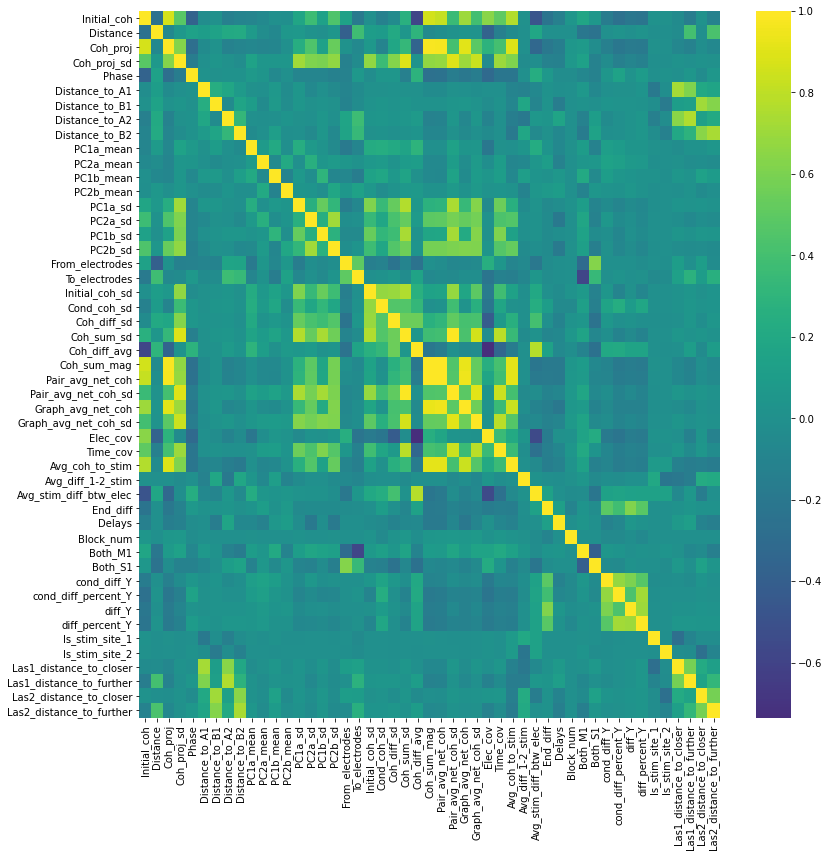

In [21]:
plt.figure(figsize=(13, 13))
sns.heatmap(dataframes["theta"].corr(), cmap="viridis", center=0)

In [22]:
for band in ["theta", "beta", "gamma", "high_gamma"]:
    #dataframes[band].rename(columns={"Coh_diff_mag": "Coh_diff_avg"}, inplace=True)
    dataframes[band] = dataframes[band].drop(columns = ['Distance_to_A1', 'Distance_to_B1', 'Distance_to_A2', 'Distance_to_B2',
                                                       'Coh_sum_mag', 'Coh_sum_sd', 'PC1a_mean', 'PC2a_mean', 'PC1b_mean', 
                                                        'PC2b_mean', 'PC1a_sd', 'PC2a_sd', 'PC1b_sd', 'PC2b_sd',
                                                       'Cond_coh_sd', 'Avg_diff_1-2_stim'])

In [23]:
# if during-stim data

#for band in ["theta", "beta", "gamma", "high_gamma"]:    
#    dataframes[band] = dataframes[band].drop(columns = ['cond_diff_Y', 'cond_diff_percent_Y'])

In [24]:
dataframes["theta"].columns

Index(['Initial_coh', 'Distance', 'Coh_proj', 'Coh_proj_sd', 'Phase',
       'From_electrodes', 'To_electrodes', 'Initial_coh_sd', 'Coh_diff_sd',
       'Coh_diff_avg', 'Pair_avg_net_coh', 'Pair_avg_net_coh_sd',
       'Graph_avg_net_coh', 'Graph_avg_net_coh_sd', 'Elec_cov', 'Time_cov',
       'Avg_coh_to_stim', 'Avg_stim_diff_btw_elec', 'End_diff', 'Delays',
       'Monkeys', 'Block_num', 'Experiment_block_key', 'Both_M1', 'Both_S1',
       'cond_diff_Y', 'cond_diff_percent_Y', 'diff_Y', 'diff_percent_Y',
       'Is_stim_site_1', 'Is_stim_site_2', 'Las1_distance_to_closer',
       'Las1_distance_to_further', 'Las2_distance_to_closer',
       'Las2_distance_to_further'],
      dtype='object')

In [25]:
pkl.dump(dataframes, open("C:\\Users\\julien\\lab\\data\\5sec_processed_optodata_withshort_3aug20.pkl", "wb"))